#  OVERSUMO 
###  Character: Widowmaker

***

!["wmaker"](widowmaker1.jpg "widowmaker")

Let's start out data journey:

In [283]:
# loading packages
%matplotlib inline

# manipulation and summaries
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import missingno as msno # missing values
import seaborn as sns # advanced vizs
import plotly # tables
import plotly.plotly as py
plotly.tools.set_credentials_file(username= 'datageekette', api_key = 'INwXZn8bkUZVIXHTGnTc')
import plotly.figure_factory as ff

# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats # one way anova
from statsmodels.stats.multicomp import pairwise_tukeyhsd #tukey test

# machine learning
from scipy import stats 


# importing data
wm = pd.read_csv("widowmaker.csv")
wm.columns

Index(['player_id', 'platform', 'platform_type', 'game_mode', 'timestamp',
       'player_level', 'competitive_rank', 'time_played_total', 'damage_done',
       'death', 'elimination', 'final_blow', 'game_played', 'game_played_raw',
       'game_won', 'game_tied', 'game_lost', 'medal_bronze', 'medal_gold',
       'medal_silver', 'solo_kill', 'time_played', 'time_spent_on_fire',
       'shot_hit', 'shot_fired', 'critical_hit', 'weapon_accuracy',
       'critical_hit_accuracy', 'win_percentage_blizzard',
       'on_fire_percentage', 'winrate', 'multikill', 'objective_kill',
       'melee_final_blow', 'environmental_kill', 'objective_time',
       'hero_specific_stat_1', 'hero_specific_stat_2', 'hero_specific_stat_3',
       'hero_specific_stat_4', 'hero_specific_stat_5', 'hero_specific_stat_6',
       'hero_specific_stat_7', 'hero_specific_stat_8', 'hero_specific_stat_9',
       'hero_specific_stat_10'],
      dtype='object')

For the widowmaker we have folowing specific stats:
- `hero_specific_stat_1`: scoped_accuracy
- `hero_specific_stat_2`: scoped_critical_hit
- `hero_specific_stat_3`: venom_mine_kill
- `hero_specific_stat_4`: scoped_shot
- `hero_specific_stat_5`: scoped_hit

So the rest of `hero_specific_stat` can be dropped.

In [284]:
wm.drop(wm.columns[[-1, -2, -3, -4, -5]], 
        axis = 1, # 1 for columns
        inplace = True) # assigns to the wm dataframe

## I. EDA: Exploratory Data Analysis 

##### As John Tukey, the father of EDA and boxplot, said: 
>  Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone. 

In [285]:
# first and last 5 observations
wm.head(5).append(wm.tail(5))

,player_id,platform,platform_type,game_mode,timestamp,player_level,competitive_rank,time_played_total,damage_done,death,...,multikill,objective_kill,melee_final_blow,environmental_kill,objective_time,hero_specific_stat_1,hero_specific_stat_2,hero_specific_stat_3,hero_specific_stat_4,hero_specific_stat_5
0,c5a1ea22ad029a658d6278acd893bf3a,psn,console,competitive_play,1493285137,54,1576.0,104400.0,554.0,2.0,...,NaN,NaN,NaN,NaN,3.0,0.500000,NaN,1.0,6.0,3.0
1,a2464998dd3881c9e96d15f25ceef3b9,xbl,console,competitive_play,1493285106,384,3301.0,331200.0,130710.0,100.0,...,NaN,65.0,2.0,NaN,128.0,0.452892,142.0,36.0,2144.0,971.0
2,947158d783411cd48c131fdee4e44e22,psn,console,competitive_play,1493285103,214,2156.0,32400.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e615283ff11debbd4cbe6700f11d22bb,pc/us,pc,competitive_play,1493285097,57,1672.0,10800.0,664.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.571429,NaN,NaN,7.0,4.0
4,34786b7031b5a8cae2f7eb87ea4b501b,psn,console,competitive_play,1493285094,119,2019.0,108000.0,7777.0,7.0,...,NaN,4.0,NaN,NaN,8.0,0.379085,6.0,1.0,153.0,58.0
49995,d9af405ccd3ef68344b5c05050f66f7b,pc/kr,pc,competitive_play,1493242484,114,1417.0,79200.0,3550.0,9.0,...,NaN,1.0,NaN,NaN,NaN,0.393443,1.0,1.0,61.0,24.0
49996,27a2873506686fc23afa89ca6ef36b44,psn,console,competitive_play,1493242483,74,1446.0,72000.0,5752.0,7.0,...,NaN,3.0,NaN,NaN,NaN,0.443548,6.0,NaN,124.0,55.0
49997,2c7bcb3eaaceebc0b68ed2f17fa6fda2,pc/us,pc,competitive_play,1493242483,407,2392.0,183600.0,727.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.888889,2.0,NaN,9.0,8.0
49998,893a66c06591aaaaffca5c128c2a6f42,pc/us,pc,competitive_play,1493242482,302,2421.0,136800.0,320.0,2.0,...,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,10.0,3.0
49999,c9b21c831152c227ea1e4a22a5cc1e68,pc/kr,pc,competitive_play,1493242482,361,2345.0,79200.0,63152.0,51.0,...,NaN,27.0,1.0,NaN,98.0,0.507821,76.0,8.0,959.0,487.0


In [286]:
# game_mode values
wm['game_mode'].unique()

array(['competitive_play'], dtype=object)

This variables doesn't add up valuable information to the dataset. We can safely drop it.

In [287]:
wm.drop(wm.columns[3], 
        axis = 1, # 1 for columns
        inplace = True) # assigns to the wm dataframe

Basic summary statistics:

In [289]:
wm.iloc[:, 4:].describe()

,player_level,competitive_rank,time_played_total,damage_done,death,elimination,final_blow,game_played,game_played_raw,game_won,...,multikill,objective_kill,melee_final_blow,environmental_kill,objective_time,hero_specific_stat_1,hero_specific_stat_2,hero_specific_stat_3,hero_specific_stat_4,hero_specific_stat_5
count,50000.000000,49472.000000,5.000000e+04,4.636400e+04,44352.000000,41229.000000,38915.000000,50000.000000,50000.000000,32841.000000,...,3058.000000,32017.000000,6321.000000,60.000000,32283.000000,47067.000000,38060.000000,26150.000000,47067.000000,45729.000000
mean,300.969120,2605.065835,1.710299e+05,3.202465e+04,32.558577,79.468069,53.965309,3.336620,3.378023,2.046192,...,1.806082,27.794859,2.515108,1.016667,80.247716,0.449961,47.388781,10.263021,499.406081,250.816987
std,195.199676,648.693988,1.373438e+05,1.249729e+05,108.709906,307.663986,208.958044,11.897078,11.894178,7.228157,...,2.299323,93.370751,4.558911,0.129099,245.910914,0.147724,188.632841,30.328079,1882.073467,973.969470
min,0.000000,46.000000,4.982411e+01,1.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,156.000000,2173.000000,7.200000e+04,1.423000e+03,2.000000,4.000000,3.000000,0.000000,0.180000,0.000000,...,1.000000,2.000000,1.000000,1.000000,5.000000,0.389831,3.000000,1.000000,24.000000,11.000000
50%,263.000000,2596.000000,1.368000e+05,5.084500e+03,7.000000,13.000000,9.000000,1.000000,0.670000,0.000000,...,1.000000,6.000000,1.000000,1.000000,18.000000,0.461538,8.000000,3.000000,82.000000,40.000000
75%,403.000000,3007.000000,2.376000e+05,1.956150e+04,23.000000,49.000000,33.000000,2.000000,2.340000,1.000000,...,2.000000,19.000000,2.000000,1.000000,61.000000,0.521368,28.000000,8.000000,312.000000,153.000000
max,2430.000000,4805.000000,1.724400e+06,7.078856e+06,5165.000000,17042.000000,11118.000000,569.000000,569.460000,367.000000,...,65.000000,3688.000000,164.000000,2.000000,8408.000000,1.000000,12630.000000,936.000000,107798.000000,54581.000000


Already at this point we can judge the skewness of data distributions:

- `competitive_rank` data is likely to be normally distributed as its mean 2605 and median 2596 are almost equal (mode is equal to 3000)
- first half of `player_level` data is under 263 level with a max of 2430, which shows higly skewed form of distribution
- as well as `game_played` where __the average number of games played (in total) is equal to 3__ with a max of 569.

__The last variable can cause noisy data: players who tried playing a charachter and stopped after few games.__ 

In [ ]:
# grouping variables for further analysis
general = ['player_level', 'platform', 'competitive_rank', 'time_played_total', 'winrate']

colorscale = [[0, '#4E237A'],[.5, '#EFEBF3'],[1, '#ffffff']]
general = ff.create_table( wm.loc[0:6 , general], colorscale = colorscale)
py.iplot(general, filename = 'wm_general')

!["table"](general_first.png "table")

In [ ]:
game = ['game_played', 'game_won', 'game_tied', 'game_lost']
game = ff.create_table( wm.loc[0:6 , game], colorscale = colorscale)
py.iplot(game, filename = 'wm_game')

!["table"](game_first.png "table")

### Gone Missing 

We've seen that we miss quite a lot of data. So what's missing data? 

It's the data that we know exists, but which, due to sparse or incomplete data collection, has no actual value. However for most case there arevariables which don't carry any informational content at all defining the non-data term. This means that when answering the question "is this data entry filled?" one must actually consider three possible answers: "Yes", "No, but it can be", and "No, and it cannot be".

There are two types of missing data: the one that occurs at random - nullity pattern - and not at random. In the first case of having a sufficiently large number of observations we can safely drop these observations using `drop()`.

Far more troubling, when data not missing at random, dropping the data and modeling what's left would result in falsehoods, as we will ignore a potentially important information.

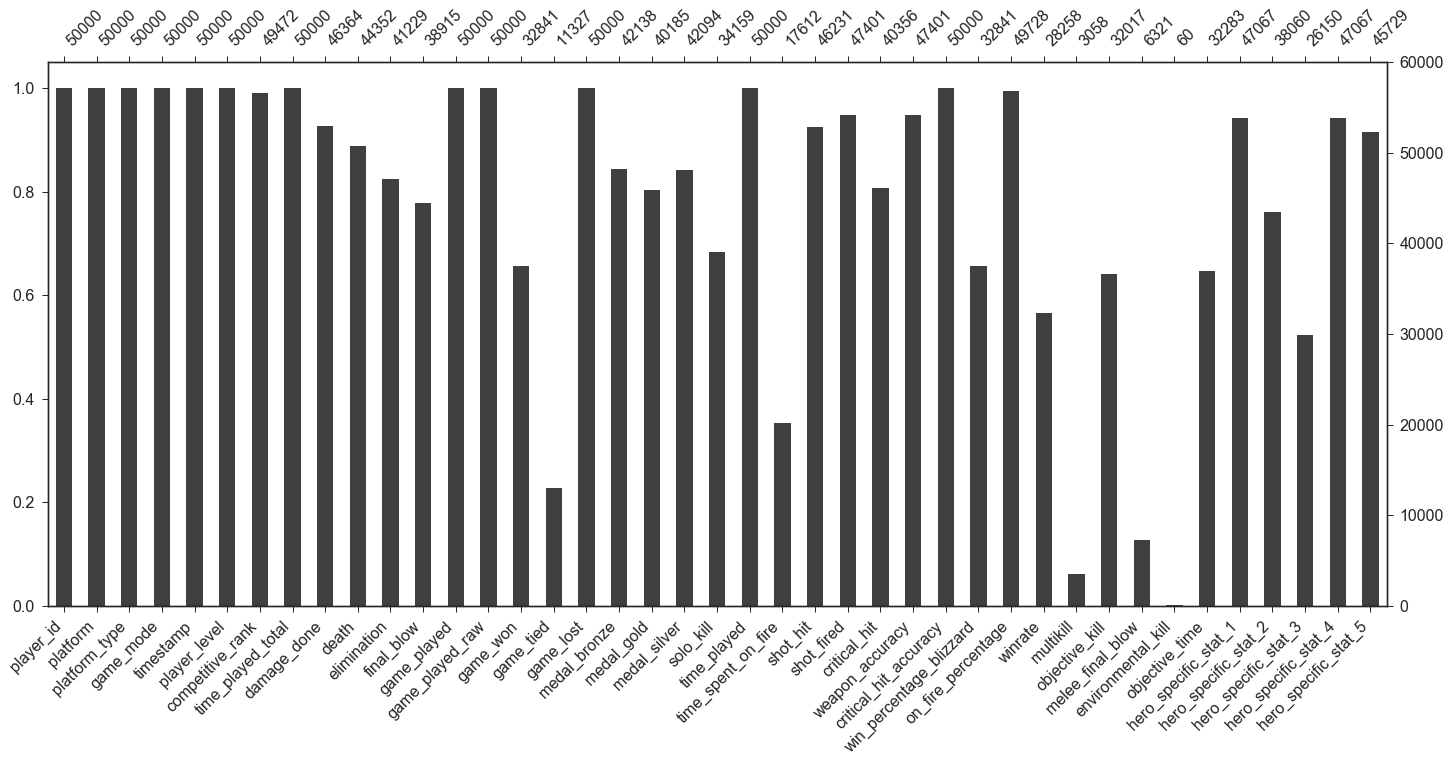

In [4]:
sns.set(style = "ticks")
msno.bar(wm)

In this specific case most of the missing values could be considered as 'no available information' - non data - and thus dropped. However there are a few variables that should have data like `cometitive_rank` or `damage_done`. At least zeros in both cases. 

In [290]:
# na's in competitive rank
wm[np.isnan(wm['competitive_rank'])].head(5)

,player_id,platform,platform_type,timestamp,player_level,competitive_rank,time_played_total,damage_done,death,elimination,...,multikill,objective_kill,melee_final_blow,environmental_kill,objective_time,hero_specific_stat_1,hero_specific_stat_2,hero_specific_stat_3,hero_specific_stat_4,hero_specific_stat_5
24,ff9ab65717d8bd4c7a185281698d0588,xbl,console,1493284955,160,NaN,104400.0,2358.0,8.0,11.0,...,1.0,3.0,NaN,NaN,29.0,0.257143,1.0,7.0,35.0,9.0
287,b65c5864821f2003321839b233bc6398,pc/us,pc,1493284860,604,NaN,3060.0,2538.0,3.0,3.0,...,NaN,1.0,NaN,NaN,1.0,0.607143,3.0,NaN,28.0,17.0
485,8ebe283cb0bd3364ba0dbf70a09f625e,pc/us,pc,1493284777,196,NaN,50400.0,4421.0,5.0,9.0,...,NaN,1.0,NaN,NaN,NaN,0.344828,11.0,NaN,87.0,30.0
788,f83c2014cc263fd7c98131e7329296db,psn,console,1493284543,56,NaN,1380.0,178.0,1.0,NaN,...,NaN,NaN,NaN,NaN,4.0,0.333333,NaN,NaN,6.0,2.0
814,909a72bb8b2e201f7e8c678e294da579,pc/us,pc,1493284501,200,NaN,7200.0,3864.0,16.0,9.0,...,NaN,2.0,NaN,NaN,5.0,0.258503,NaN,1.0,147.0,38.0


In [291]:
# na's in competitive rank
wm[np.isnan(wm['damage_done'])].head(5)

,player_id,platform,platform_type,timestamp,player_level,competitive_rank,time_played_total,damage_done,death,elimination,...,multikill,objective_kill,melee_final_blow,environmental_kill,objective_time,hero_specific_stat_1,hero_specific_stat_2,hero_specific_stat_3,hero_specific_stat_4,hero_specific_stat_5
2,947158d783411cd48c131fdee4e44e22,psn,console,1493285103,214,2156.0,32400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6557cc23fc5f6680424886e078034e22,pc/us,pc,1493285077,254,1830.0,36000.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN
9,bd83d285f3804eea287673096d05ce76,psn,console,1493285001,490,2410.0,295200.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,00a834229821959a9f21c342402f3c4d,psn,console,1493284998,105,2007.0,64800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,b9acb29111d35d6c2cbee970cf718eb6,psn,console,1493284944,202,2467.0,32400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For some unknown reasons some playes were not attributed neither a rank nor the volume of done damage even though their total played game is not null. We can check by the use of dendrogram if the variable completion is correlated to any other variables and possibly reveal unseen trends:

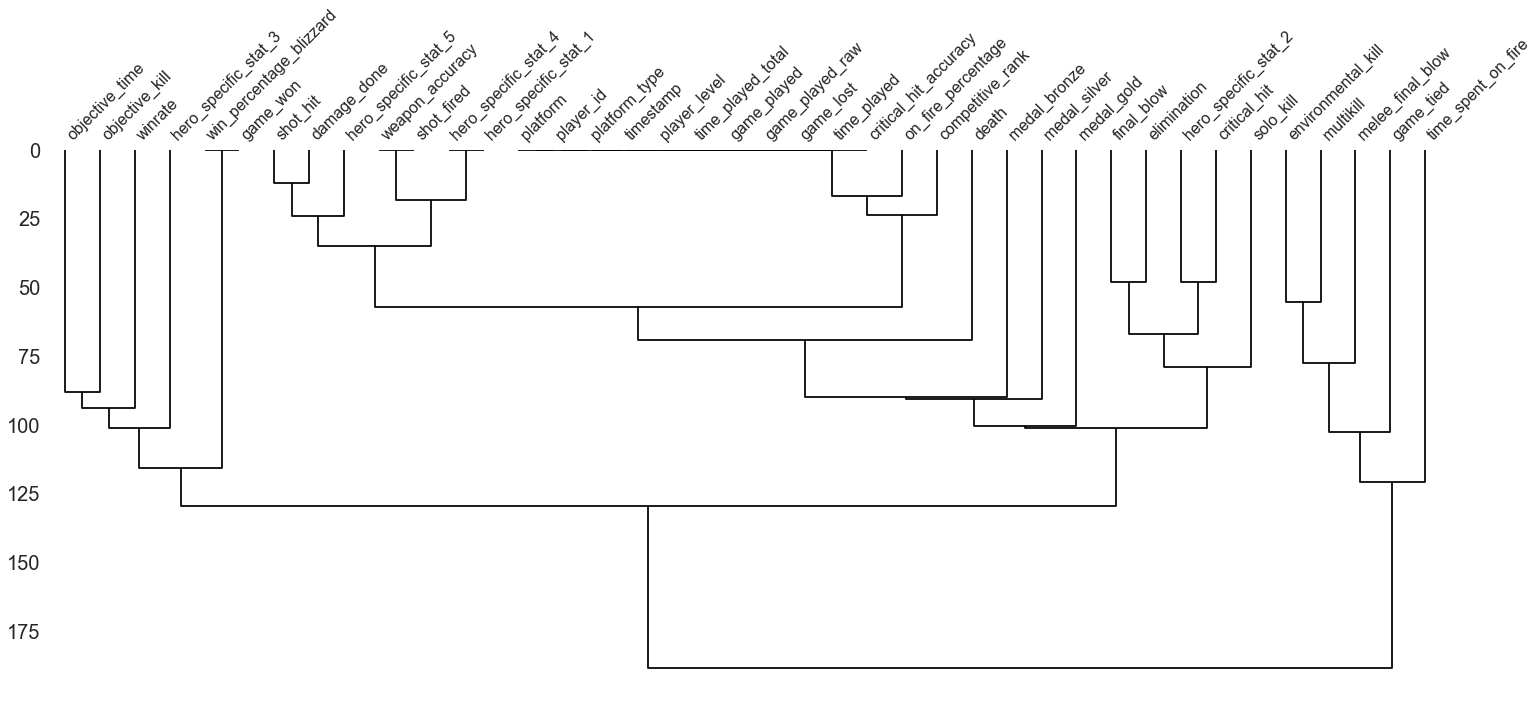

In [292]:
msno.dendrogram(wm)

To interpret this graph we read from a top-down perspective. Cluster leaves which linked together predict one another's presence — one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. 

By looking at the `competitive_rank`, its completion depends on the `on_fire_percentage` paired with `critical_hit_accuracy` and variables (in the middle) like `platform`, `platform_type`, `player_id`, `time_played_raw `and so on, which also predict availability of each other. 

In [293]:
# na's in competitive rank for on_fire_percentage and critical_hit_accuracy
_ = wm.loc[:, ['competitive_rank', 'on_fire_percentage', 'critical_hit_accuracy', 'time_played', 'time_played_raw']]
_[np.isnan(wm['competitive_rank'])].head(5)

,competitive_rank,on_fire_percentage,critical_hit_accuracy,time_played,time_played_raw
24,NaN,0.000000,0.011236,420.000000,NaN
287,NaN,0.000000,0.136364,120.000000,NaN
485,NaN,0.027778,0.233333,360.000000,NaN
788,NaN,0.000000,0.000000,52.282848,NaN
814,NaN,0.000000,0.042105,960.000000,NaN


Indee for almost zero `on_fire_percentage` and with no information of `time_played_raw` there is no data on the `competitive_rank` of a player.

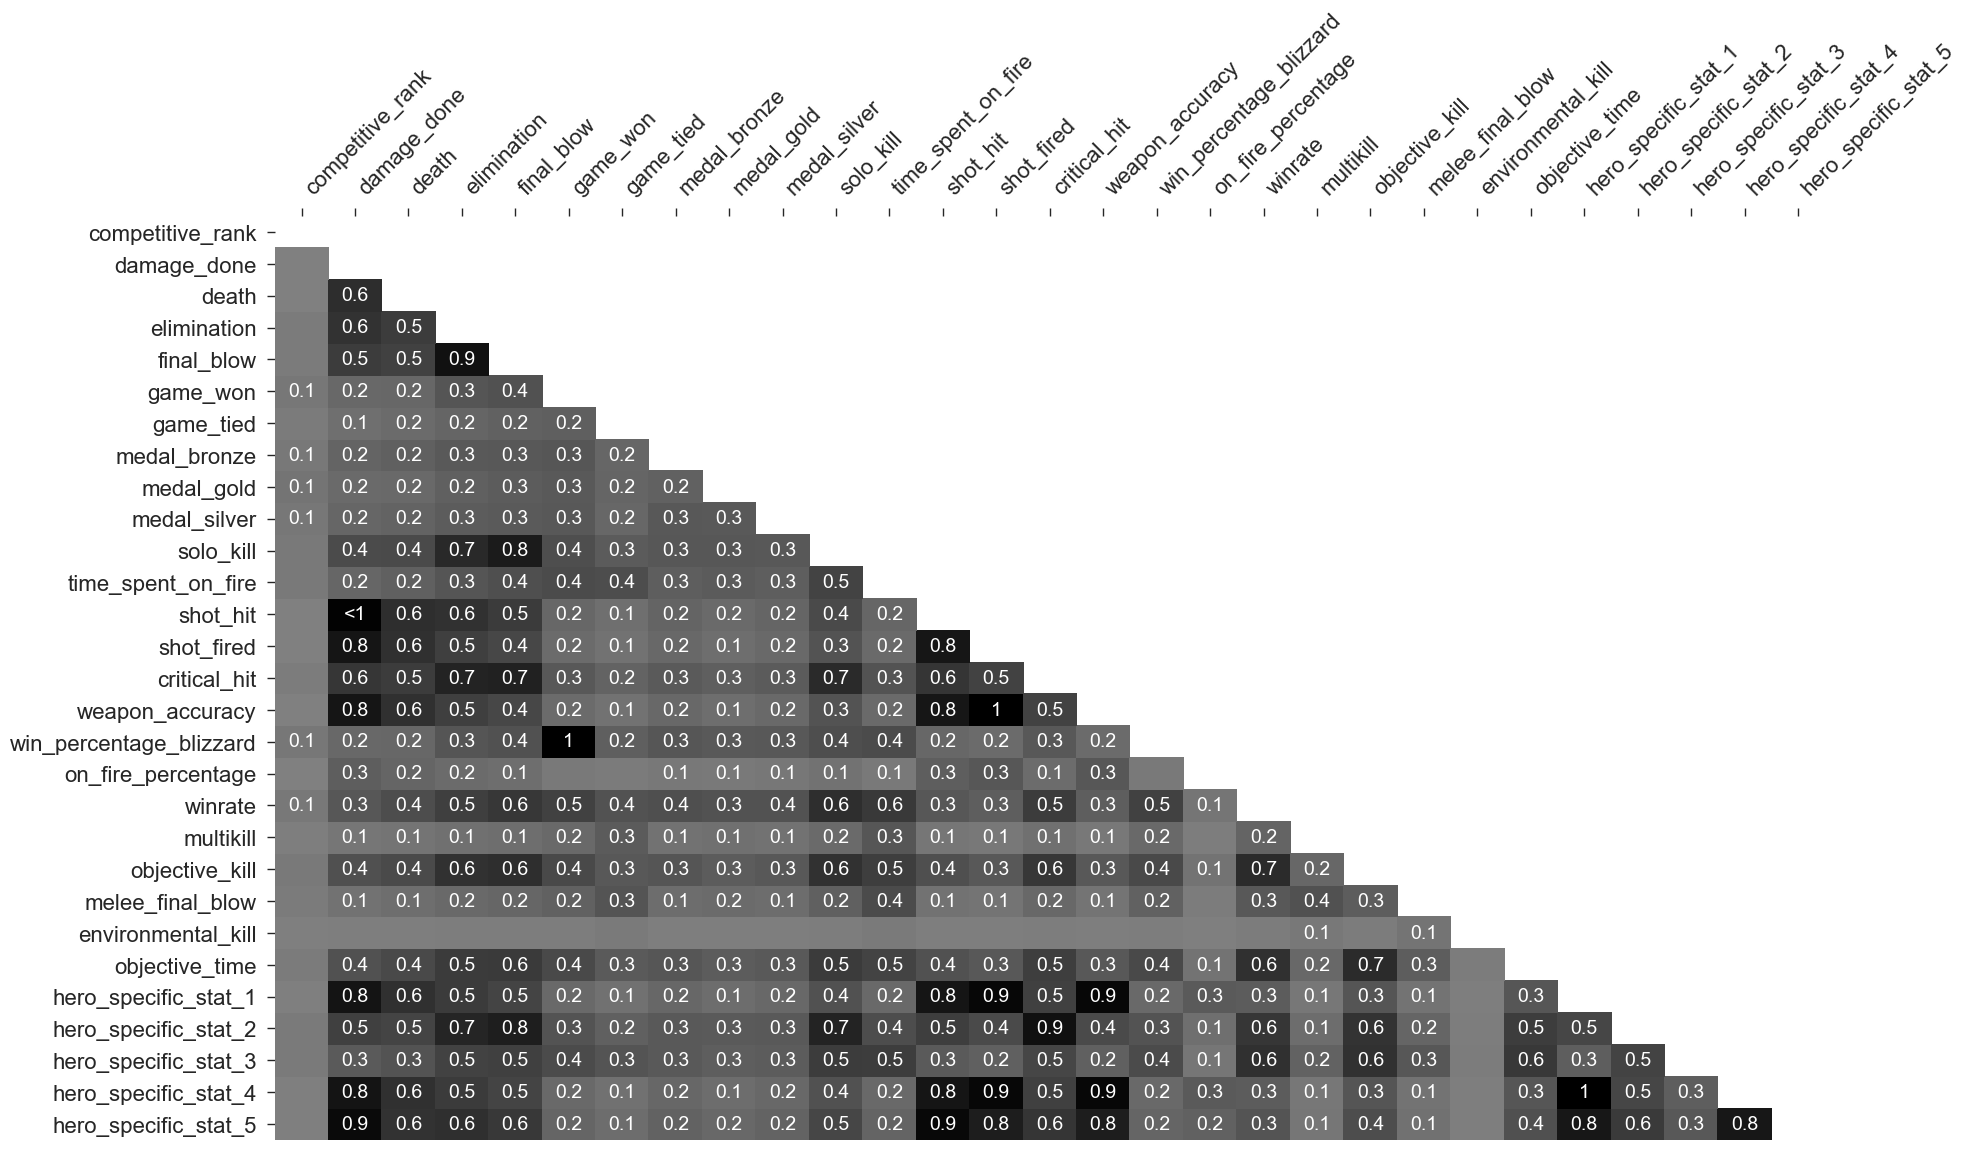

In [238]:
# nullity pattern
msno.heatmap(wm, cmap = 'binary') 

We see here as well as obvious correlations, such as if there's a `game_won` than `win_percentage_blizzard` is also present, and less obvious ones, like high correlaions between `hero_specific_stat_5`, `hero_specific_stat_4`, `hero_specific_stat_1` and `damage_done`, which reveal the usage of most frequent skills.

__For now, we leave missing valuea as they are to see if we can come up with the filter-solution which could eliminate most if the NaNs.__

### ECDF: empirical cumulative distribution function 

Why is the Empirical Cumulative Distribution useful in Exploratory Data Analysis?

- it approximates the true CDF well if the sample size (the number of data) is large and knowing the distribution is helpful for statistical inference 
- it can visually display “how fast” the ECDF increases to 1.0
- plotting key quantiles like the quartiles is useful to get a feel for the data

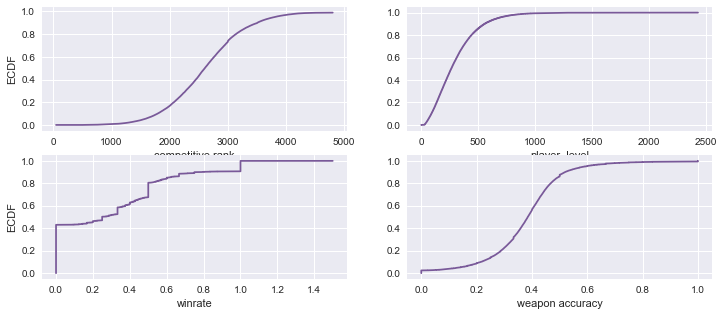

In [249]:
sns.set()# to format into seaborn 
plt.figure(figsize = (12, 5)) # for subplots

plt.subplot(221)
cdf = ECDF(wm['competitive_rank'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#795999');
plt.xlabel('competitive rank'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(222)
cdf = ECDF(wm['player_level'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#795999');
plt.xlabel('player_level');

# plot third ECDF  
plt.subplot(223)
cdf = ECDF(wm['winrate'].dropna()) # to achieve 100%
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#795999');
plt.xlabel('winrate'); plt.ylabel('ECDF');

# plot third ECDF  
plt.subplot(224)
cdf = ECDF(wm['weapon_accuracy'].dropna())
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#795999');
plt.xlabel('weapon accuracy');

Short summary of the plots above. Read from top left to bottom right:
1. The 80% of the ranks are less than 3000 and almost all competitive ranks are between 1000 and 4000.
2. About 90% of players have levels lower than 500.
3. For about 40% of players the winrate is equal to zero and for 90% - less than 1.0.
4. More than a half of players (60%) have less than 0.4 weapon accuracy.

### II. Feature Engineering and Data Selection

#### - Missing: platforms 

Check the data distribution for the categorical variable `platform`:

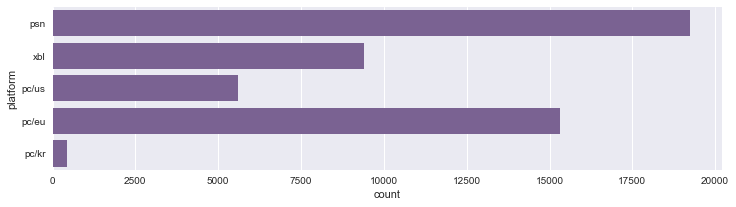

In [27]:
f, ax = plt.subplots(figsize = (12, 3))
sns.countplot(y = 'platform', data = wm, color = '#7A5A9A')

Sadly enough we have almost no data on South Korean PC platform. It makes sense to drop it for further analysis.

In [294]:
wm.drop(wm[wm.platform == 'pc/kr'].index, 
        inplace = True)

#### - Per unit of `time_played` (min and sec)

Short description of time variables:
- `time_played`: the time value in seconds for a whole period of playing a widowmaker.
- `time_played_total`: the time value in seconds for a whole period of playing (for an account)

In [295]:
# to minutes
wm['time_played_min'] = wm['time_played'] / 60

print('On average a player plays for widowmaker', 
      round(wm.time_played_min.mean(), 2), 
      'minutes out of the total time played.')

On average a player plays for widowmaker 35.3 minutes out of the total time played.


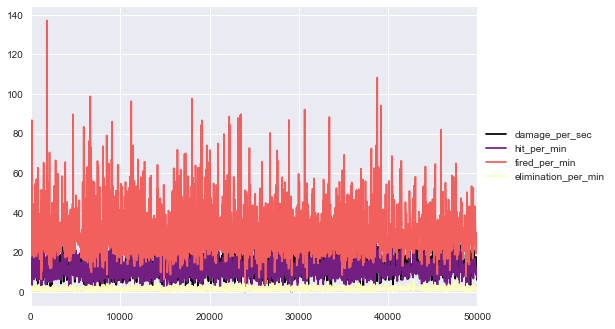

In [382]:
wm['damage_per_sec'] = wm['damage_done'] / wm['time_played'] 
wm['hit_per_min'] = wm['shot_hit'] / wm['time_played_min'] 
wm['fired_per_min'] = wm['shot_fired'] / wm['time_played_min'] 
wm['elimination_per_min'] = wm['elimination'] / wm['time_played_min']

# plot distributions
sns.set()
ax = wm[['damage_per_sec', 'hit_per_min', 'fired_per_min', 'elimination_per_min']].plot(cmap = 'magma')
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

It is clear from the profile plot that the mean and standard deviation for `fired_per_min` is a lot higher than that for the other variables.

#### - Low popularity of a widowmaker charachter

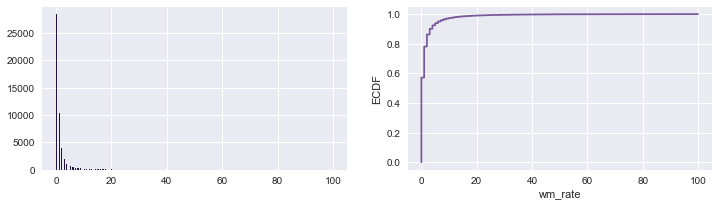

In [297]:
plt.figure(figsize = (12, 3))

# part of time played as a widowmaker to the whole period
wm['wm_rate'] = round(wm['time_played'] / wm['time_played_total'] * 100)

# overall distribution
plt.subplot(121)
plt.hist(wm['wm_rate'].dropna(), 
         bins = int(np.sqrt(len(wm['wm_rate']))), # n of bins = square root of number of obs.
         color = '#241440');

# plot third ECDF  
plt.subplot(122)
cdf = ECDF(wm['wm_rate'].dropna()) # to achieve 100%
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#795999');
plt.xlabel('wm_rate'); plt.ylabel('ECDF');

Indeed, widowmaker charachter is not the most popular one. About 80% of players don't play it at all. Let's look at another extreme of the variable:

In [298]:
# top 10 of those who play only widowmaker 
# sorted by level
wm.loc[:, ['wm_rate', 'player_level', 'competitive_rank']].sort_values(
    by = ['wm_rate', 'player_level'], ascending = False).head(10)

,wm_rate,player_level,competitive_rank
29187,100.0,451,NaN
40572,100.0,275,2012.0
25961,100.0,264,NaN
47066,100.0,154,1593.0
18995,100.0,145,NaN
41287,100.0,143,1850.0
17657,100.0,104,2788.0
22191,100.0,63,3176.0
4466,100.0,58,2388.0
37897,100.0,58,2388.0


#### - Won per game = winrate?

In [299]:
wm['won_per_game'] = wm['game_won'] / wm['game_played']
wm.loc[:, ['winrate', 'won_per_game']].describe()

,winrate,won_per_game
count,28002.000000,24046.000000
mean,0.302053,0.340806
std,0.323119,0.321479
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.250000,0.333333
75%,0.500000,0.500000
max,1.500000,1.000000


Almost identical. Though winrate of 150% out of 100% seems pretty impossible percentage. 

As disscused before, the number of games has higly spread distribution with an average number of games of 3. So I assumed that mst of the players were only trying the widowmaker and not continiung any further. This assumption was succesfully prooved by the low popularity of a charachter. 

<div class="alert alert-block alert-info"> For the further analysis I take only those players, who played at widowmaker at least 5% of their total time in the game. The size of the sample will definetly shrink, because almost 80% of players don't play the charachter, but we will decrease the variance of the dataset and it will be still large enough for any inferences on the dataset. </div>

In [300]:
wm = pd.DataFrame(wm[wm['wm_rate'] >= 5])
wm.loc[:, ['player_level', 'won_per_game']].describe()

,player_level,won_per_game
count,3778.000000,3422.000000
mean,247.308629,0.454812
std,202.854372,0.209596
min,0.000000,0.000000
25%,92.000000,0.333333
50%,193.000000,0.461538
75%,351.000000,0.545455
max,1834.000000,1.000000


The size of sample was drastically shrinked but still quite large - 3778 observations. But the standard deviation of `won_per_game` also fell down from 0.32 to 0.21.

#### - `death ` into `life` 

We can also think of player's achievements in terms of games and lifes. Let's first look at the distribution of the variable of interest: `death` total number of deaths per each player.

In [305]:
wm.loc[:, 'death'].describe()

count    3769.000000
mean      192.680021
std       314.696187
min         1.000000
25%        26.000000
50%        92.000000
75%       236.000000
max      5165.000000
Name: death, dtype: float64

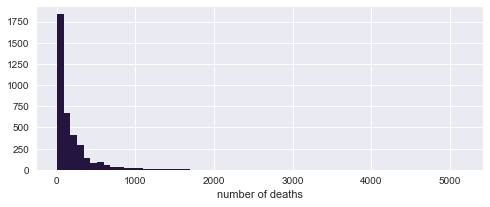

In [308]:
sns.set() # to format into seaborn 
plt.figure(figsize = (8, 3))
plt.hist(wm['death'].dropna(), 
         bins = int(np.sqrt(len(wm['death']))), # n of bins = square root of number of obs.
         color = '#241440'); 
plt.xlabel('number of deaths');

So what's the opposite of death? Not going deeper into philosophy - most probably it is life. We know that after each death a player can respawn infinite number of times until the end of a session. So based on `death` we can deduct a total number of lifes per player: `life` = `death` + 1.

In [303]:
# +1 for every respawn after death
wm['life'] = wm['death'] + 1 
wm['damage_per_life'] = wm['damage_done'] / wm['life']

# summary for new variables
wm.loc[:, ['life', 'damage_per_life', 'damage_per_sec']].describe() 

,life,damage_per_life,damage_per_sec
count,3769.000000,3769.000000,3776.000000
mean,193.680021,1048.740563,13.730208
std,314.696187,447.620026,4.574536
min,2.000000,20.375000,0.679167
25%,27.000000,771.261905,10.991111
50%,93.000000,1030.169591,13.783659
75%,237.000000,1287.320755,16.170669
max,5166.000000,5507.500000,36.586389


- On average each player (among frequent widowmaker players) respawn 193 times.
- On average there's 1050 damage done per each life with max of 10350.
- Which gives on average 13 units of damage per second.

Let's add more `per_life` variables:

In [304]:
wm['crit_per_life'] = wm['critical_hit'] / wm['life']
wm['hit_per_life'] = wm['shot_hit'] / wm['life']
wm['solo_per_life'] = wm['solo_kill'] / wm['life']

_ = ['damage_per_life', 'crit_per_life', 'hit_per_life', 'solo_per_life']

wm.loc[:, _].describe()

,damage_per_life,crit_per_life,hit_per_life,solo_per_life
count,3769.000000,3738.000000,3769.000000,3638.000000
mean,1048.740563,1.848203,14.927403,0.667957
std,447.620026,0.859886,6.520554,0.347582
min,20.375000,0.037958,0.333333,0.015707
25%,771.261905,1.304348,10.931034,0.454041
50%,1030.169591,1.760000,13.928571,0.627963
75%,1287.320755,2.280590,17.562500,0.830838
max,5507.500000,7.571429,92.000000,4.428571


### Handling missing values

Let's check again what we miss:

In [ ]:
wm.isnull().sum()

!["nan"](nans.png "nan")

We still have quite a lot of missing information, but it's way less compared to what was before. NaNs in variables like `environmental_kill`, `multikill`, `game_tied`, `melee_final_blow` and all `hero_specific_stat_` can be replaced with zeros - there're simply no information provided.

In [309]:
zeros = ['environmental_kill', 'multikill', 'game_tied', 'melee_final_blow', 
         'hero_specific_stat_1', 'hero_specific_stat_2', 'hero_specific_stat_3', 'hero_specific_stat_4', 'hero_specific_stat_5']

wm[zeros] = wm[zeros].fillna(0)

Plot the dedrogram again:

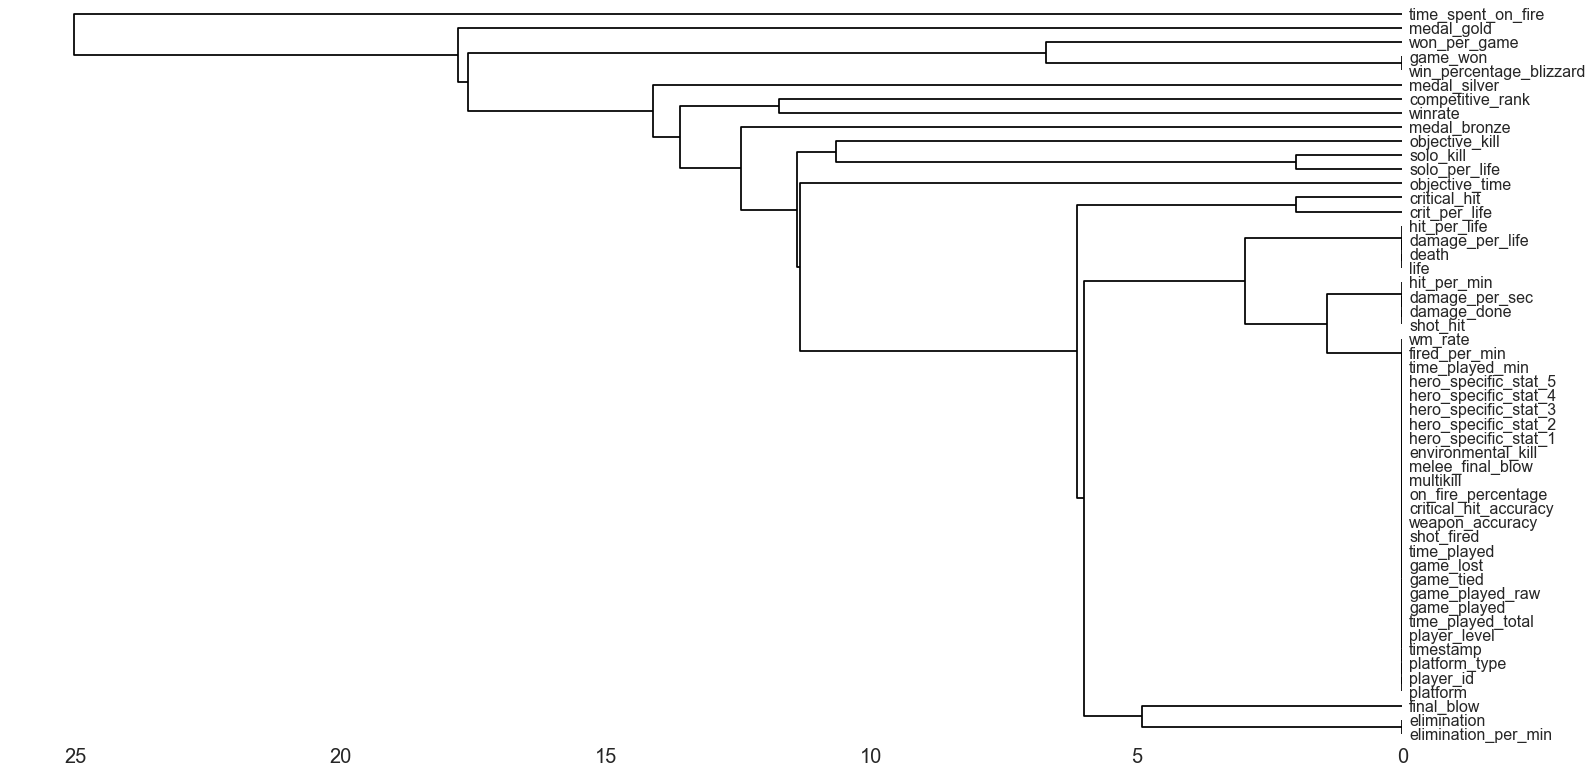

In [310]:
# more variables
msno.dendrogram(wm)

We see that `time_spent_on_fire` (with 669 missing values), `medal_gold`, `game_won` and  `win_percentage_blizzard` are tied together. The rest of the variables are related to the comletion of these four. 

In [311]:
missing = ['time_spent_on_fire', 'medal_gold', 'game_won', 'win_percentage_blizzard']

# medal_gold and others with time_spent_on_fire missing
wm[missing][np.isnan(wm['time_spent_on_fire'])].head(5)

,time_spent_on_fire,medal_gold,game_won,win_percentage_blizzard
58,NaN,NaN,1.0,0.90
69,NaN,0.0,NaN,NaN
100,NaN,1.0,1.0,1.00
102,NaN,0.0,1.0,0.33
108,NaN,1.0,0.0,0.25


In [312]:
# game_won and blizzard for medal_gold equal to 0
wm[wm.medal_gold == 0][missing].head()

,time_spent_on_fire,medal_gold,game_won,win_percentage_blizzard
35,172.0,0.0,1.0,0.72
69,NaN,0.0,NaN,NaN
102,NaN,0.0,1.0,0.33
1153,NaN,0.0,NaN,NaN
1172,NaN,0.0,1.0,0.51


We can safely replace all missing values by zeros as we don't see any specific patterns in the data.

In [316]:
wm.iloc[:, 4:].describe()

,player_level,competitive_rank,time_played_total,damage_done,death,elimination,final_blow,game_played,game_played_raw,game_won,...,hit_per_min,fired_per_min,elimination_per_min,wm_rate,won_per_game,life,damage_per_life,crit_per_life,hit_per_life,solo_per_life
count,3778.000000,3557.000000,3.778000e+03,3.776000e+03,3769.000000,3749.000000,3725.000000,3778.000000,3778.000000,3467.000000,...,3776.000000,3778.000000,3749.000000,3778.000000,3422.000000,3769.000000,3769.000000,3738.000000,3769.000000,3638.000000
mean,247.308629,2491.978353,1.273624e+05,2.164853e+05,192.680021,501.850093,329.873826,22.495236,22.515095,11.404673,...,11.842001,30.038612,1.885005,12.163843,0.454812,193.680021,1048.740563,1.848203,14.927403,0.667957
std,202.854372,747.477278,1.421161e+05,3.759353e+05,314.696187,884.018543,587.612865,36.155441,36.186449,19.062227,...,4.196323,11.253429,0.686226,11.621987,0.209596,314.696187,447.620026,0.859886,6.520554,0.347582
min,0.000000,500.000000,4.982411e+01,1.200000e+02,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,3.463120,0.133333,5.000000,0.000000,2.000000,20.375000,0.037958,0.333333,0.015707
25%,92.000000,1951.000000,2.520000e+04,2.171975e+04,26.000000,53.000000,33.000000,3.000000,3.190000,2.000000,...,9.256681,22.941111,1.487500,6.000000,0.333333,27.000000,771.261905,1.304348,10.931034,0.454041
50%,193.000000,2497.000000,6.840000e+04,9.840350e+04,92.000000,233.000000,148.000000,11.000000,11.150000,6.000000,...,11.174078,27.622083,1.875000,8.000000,0.461538,93.000000,1030.169591,1.760000,13.928571,0.627963
75%,351.000000,3000.000000,1.944000e+05,2.551338e+05,236.000000,593.000000,386.000000,27.000000,27.207500,13.000000,...,13.663889,34.084856,2.221429,13.000000,0.545455,237.000000,1287.320755,2.280590,17.562500,0.830838
max,1834.000000,4596.000000,1.220400e+06,7.078856e+06,5165.000000,17042.000000,11118.000000,569.000000,569.460000,367.000000,...,43.666667,137.083333,6.150000,100.000000,1.000000,5166.000000,5507.500000,7.571429,92.000000,4.428571


In [318]:
wm.replace(np.inf, np.nan) # replace infinite values with NaNs
wm.fillna(0, inplace = True) # fill NaNs with 0

## III. Correlation and Regression Analysis

> ... no causation is implied, simply association.

<div class="alert alert-block alert-info"> I draw an attention on the fact that in the last section I filtered the data based on the percentage played by the widowmaker to the whole time spent in the game (wm_rate > 5) in order to get rid of unwanted noise and lower the variance in the dataset.</div>

In [ ]:
time unit 
standardize
pca
svm regression - kernel poly

#####  Questions to answer: 
- What are the overall correlations? How strong they are? 
- How `competitive rank`, `player_level`, `total_time_played` and `game_played` differ from one `platform` to another? 
- Which variables are correlated to the `competitive_rank` and contribute the most to it change?

sns.We are likely to see an increase in variables such as `damage_done`, `critical_hit`, `death`, `shot_fired` with an increase in `time_played`. But these correlations are pretty obvious. What we want to catch though are hidden patterns per every unit of change in a particular variable. Like we computed before: `per_sec`, `per_min`, `per_game` and `per_life`. 

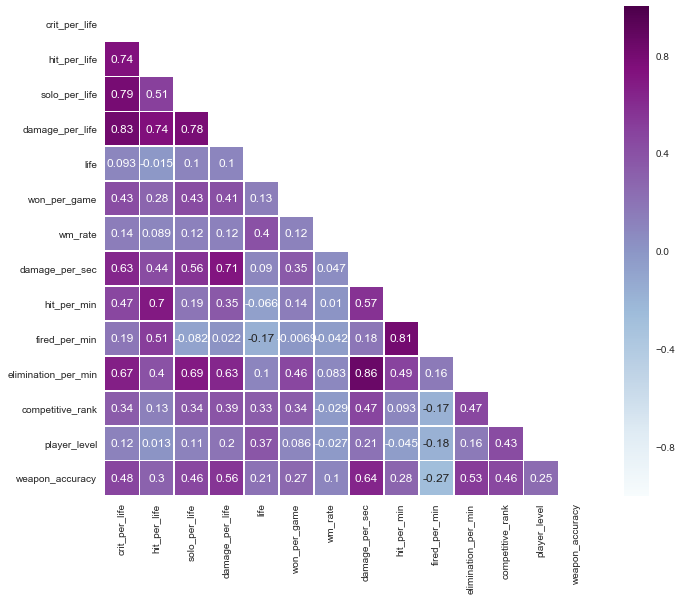

In [387]:
sns.set(style = 'white')

new_var = ['crit_per_life', 'hit_per_life', 'solo_per_life', 'damage_per_life', 'life',
           'won_per_game', 'wm_rate', 'damage_per_sec', 'hit_per_min', 'fired_per_min', 'elimination_per_min']

# Compute the correlation matrix
corr_all = wm[new_var + ['competitive_rank', 'player_level', 'weapon_accuracy']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask, annot = True,
            square = True, linewidths = .5, ax = ax, cmap = 'BuPu')      
plt.show()

We are mostly interested in correlations with `competitive_rank` and `player_level`:
- `competitive_rank` seems to be positively and linearly correlated to `damage_per_sec` (0.47) and `elimination_per_min` (also 0.47) and `weapon_accuracy` (0.46)
- `player_level`, on the other hand, has no strong positive correlation, except for the `competitive_rank` itself. 

#### - `competitive_rank` and `damage_per_sec`

Correlation between `competitive_rank` and `damage_per_sec`:

In [354]:
# how strong the correlation is
_ = stats.pearsonr(wm.competitive_rank, wm.damage_per_sec)
print("p-value:\t", _[1])
print("cor:\t\t", _[0])

p-value:	 1.38816712259e-210
cor:		 0.473640148196


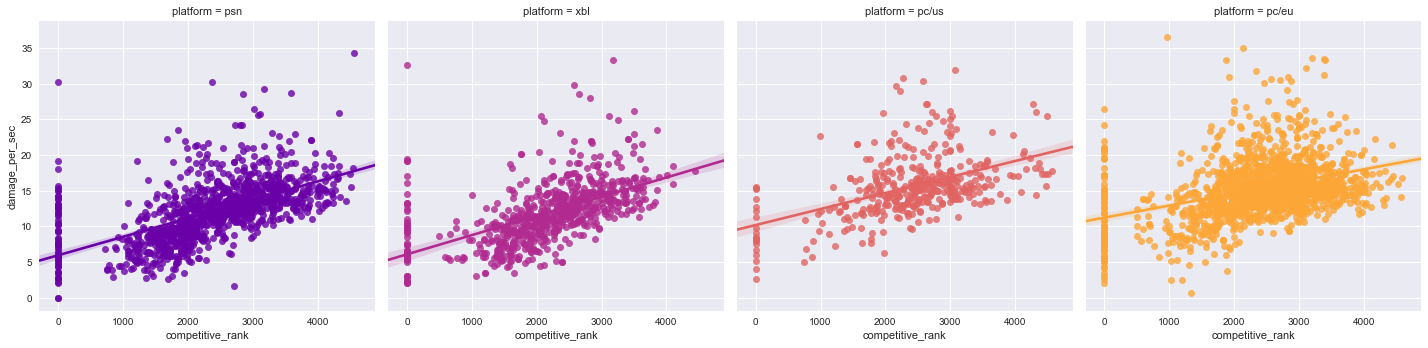

In [385]:
sns.lmplot('competitive_rank', 'damage_per_sec', wm, 
           hue = 'platform', col = 'platform',  palette = 'plasma', 
           fit_reg = True);

We can see that the relationship between variables is stronger for playstation and xbox users.

Let's have a look at the hero specific stats and how they are correlated to each other and damage_done variable. Here is a quick reminder of widowmaker's specific skills and stats:
- `hero_specific_stat_1` = scoped accuracy
- `hero_specific_stat_2` = scoped critical hit
- `hero_specific_stat_3` = venom mine kill
- `hero_specific_stat_4` = scoped shot
- `hero_specific_stat_5` = scoped hit

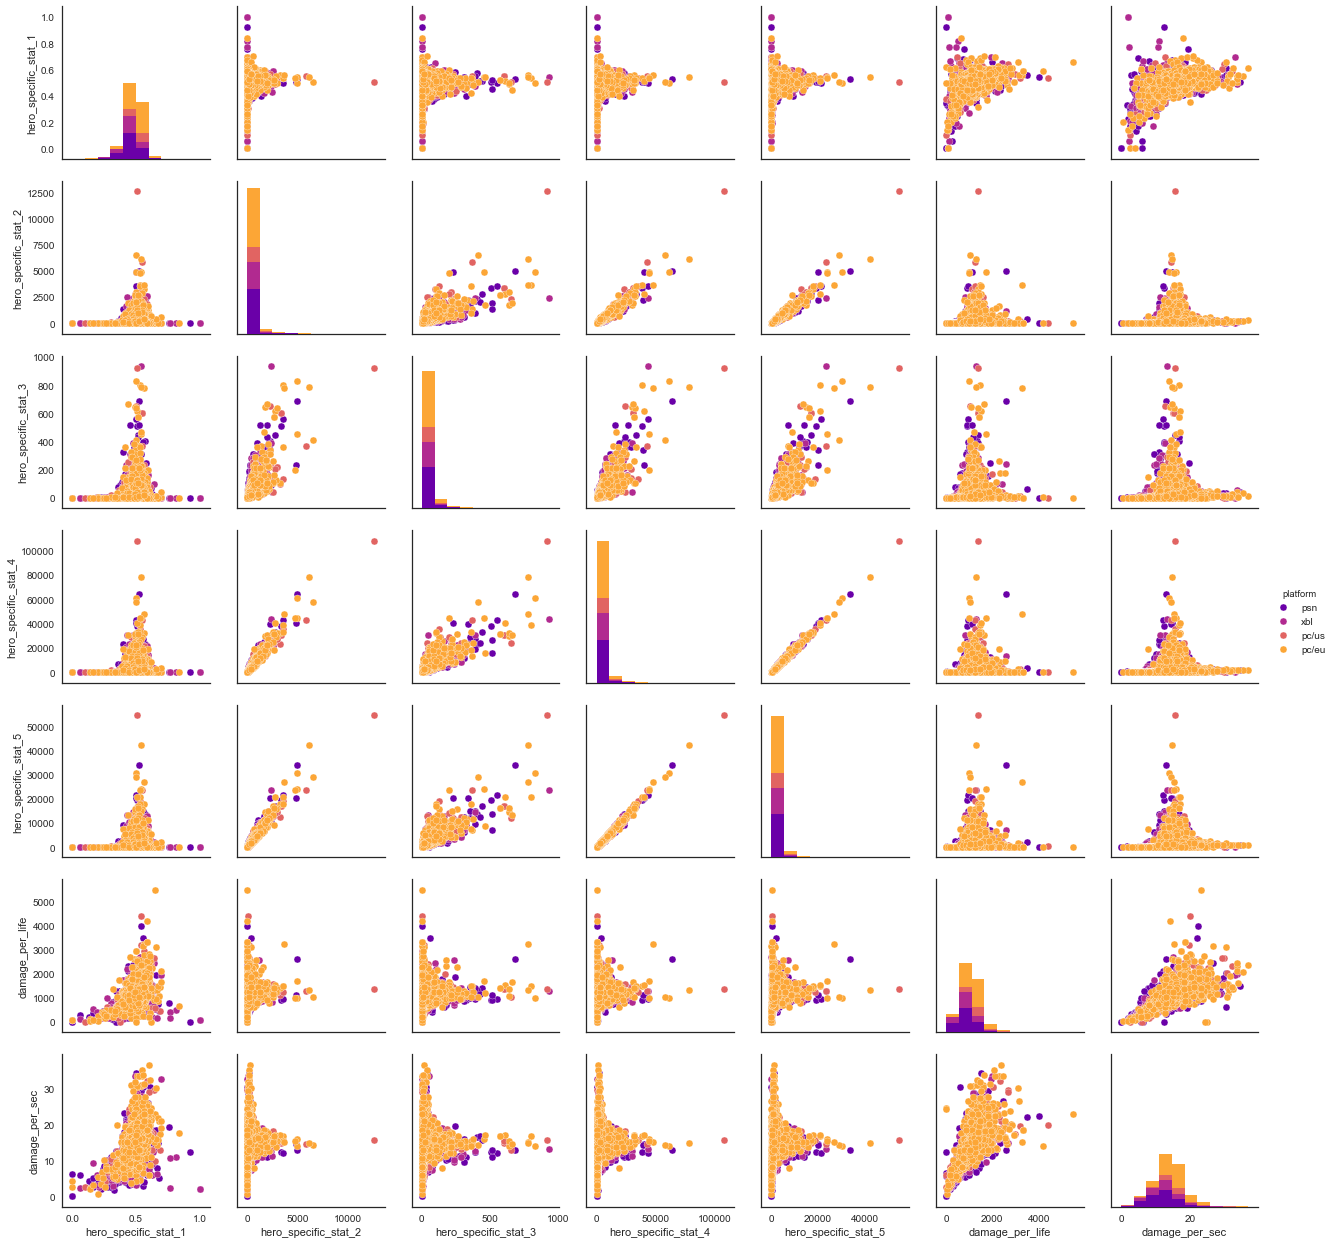

In [359]:
skills = ['hero_specific_stat_1', 'hero_specific_stat_2', 'hero_specific_stat_3',
       'hero_specific_stat_4', 'hero_specific_stat_5']

sns.pairplot(wm.loc[:, skills + ['platform', 'damage_per_life', 'damage_per_sec']], 
             hue = 'platform',
             palette = 'plasma')

Scoped shot (hss4) and scoped hit (hss5) are both in strong positive linear relationship with each other, as well as scoped shot and scoped critical hit (hss2). Apart from that, there's no strong linear correlations between selected variables.

#### - Platforms

Let's now take a closer look at one of the very few categorical variables in the dataset: `platform`. It would be interesting to see how the averages of main metrics like `player_level`, `competitive_rank` etc, differ from a platform to another.

In [364]:
wm.loc[:, general].groupby('platform').mean()

,player_level,competitive_rank,time_played_total,winrate
platform,,,,
pc/eu,265.039533,2410.370706,135274.335710,0.448361
pc/us,290.219451,2414.770574,139289.925187,0.477437
psn,242.580334,2349.269535,126491.896246,0.394289
xbl,190.933813,2159.171223,104341.208633,0.403235


Users of xbox have least impressive numbers.

### Analysis of Variances 

ANOVA is a statistical inference test that lets us compare multiple groups at the same time. By its use we can check whether numeric response variables, __player level and competitive rank__, varie according to the levels of a categorical variable, __platform__. 

In [379]:
pc_eu1 = wm.loc[:, 'player_level'][wm.platform == 'pc/eu']
pc_us1 = wm.loc[:, 'player_level'][wm.platform == 'pc/us']
psn1 = wm.loc[:, 'player_level'][wm.platform == 'psn']
xbl1 = wm.loc[:, 'player_level'][wm.platform == 'xbl']

stats.f_oneway(pc_eu1, pc_us1, psn1, xbl1)  

F_onewayResult(statistic=28.623780064359043, pvalue=2.6995045469003403e-18)

In [368]:
pc_eu2 = wm.loc[:, 'competitive_rank'][wm.platform == 'pc/eu']
pc_us2 = wm.loc[:, 'competitive_rank'][wm.platform == 'pc/us']
psn2 = wm.loc[:, 'competitive_rank'][wm.platform == 'psn']
xbl2 = wm.loc[:, 'competitive_rank'][wm.platform == 'xbl']

stats.f_oneway(pc_eu2, pc_us2, psn2, xbl2) 

F_onewayResult(statistic=12.617695553283406, pvalue=3.3205397917876814e-08)

Both tests results suggest that the groups don't have the same sample means, since the p-value is significant at a 99% confidence level. To check which groups differ after getting a positive ANOVA result, we can perform one of the most common follow up test - Tukey's test.

group1,group2,meandiff,lower,upper,reject
pc/eu,pc/us,25.1799,-3.7286,54.0885,False
pc/eu,psn,-22.4592,-42.6066,-2.3118,True
pc/eu,xbl,-74.1057,-97.6664,-50.545,True
pc/us,psn,-47.6391,-77.5866,-17.6917,True
pc/us,xbl,-99.2856,-131.6282,-66.9431,True
psn,xbl,-51.6465,-76.4709,-26.8221,True


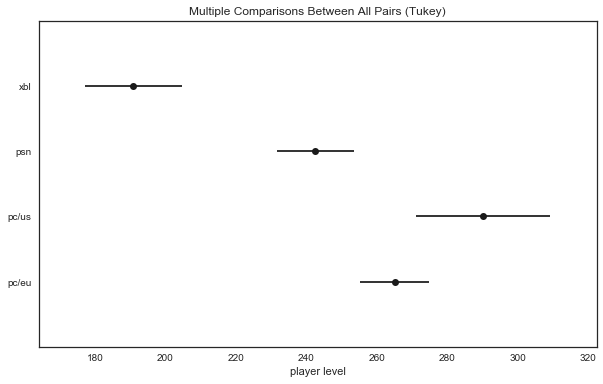

In [374]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = wm['player_level'], # player levels
                          groups = wm.platform,   
                          alpha = 0.05) # 95% CI       

# Plot group confidence intervals
tukey.plot_simultaneous()    
plt.vlines(x = 49.57, ymin = -0.5, ymax = 4.5)
plt.xlabel('player level')

# See test summary
tukey.summary()              

The output of the Tukey test shows the average difference, a confidence interval as well as whether we should retain/reject the null hypothesis for each pair of platforms at the given significance level. 

In the case of `player_level` data, the test suggest to reject the null hypothesis for almost every pair except for the pair PC/EU and PC/US. Which means that __almost every platform is significantly different from the other__ (in terms of player levels) and the 95% confidence interval plot reinforces the results visually: only two CI are overlaping.

group1,group2,meandiff,lower,upper,reject
pc/eu,pc/us,4.3999,-129.2146,138.0143,False
pc/eu,psn,-61.1012,-154.2216,32.0193,False
pc/eu,xbl,-251.1995,-360.0963,-142.3027,True
pc/us,psn,-65.501,-203.9172,72.9151,False
pc/us,xbl,-255.5994,-405.0856,-106.1131,True
psn,xbl,-190.0983,-304.8359,-75.3607,True


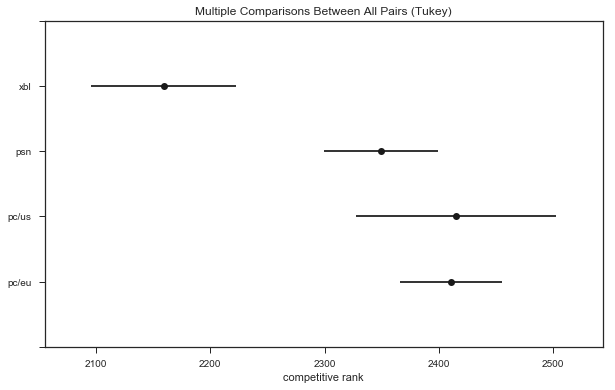

In [380]:
tukey = pairwise_tukeyhsd(endog = wm['competitive_rank'], # competitive rank
                          groups = wm.platform, 
                          alpha = 0.05) # 95% CI         

# Plot group confidence intervals
tukey.plot_simultaneous()    
plt.vlines(x = 49.57, ymin = -0.5, ymax = 4.5)
plt.xlabel('competitive rank')

# See test summary
tukey.summary()          

The test suggests rejecting the null hypothesis for every pair with __Xbox__, the same as for the `player_level`, and fail to reject every other. 

__We can conclude that PC and PlayStation players share the same competitivity characteristics. Not the same story for player levels though: PC users are the highest-level players.__

### IV. Principal Component Analysis

In [389]:
# number of observations and variables
wm.shape

(3778, 52)

The purpose of PCA is to find the best low-dimensional representation of the variation in a multivariate data set. In this case, we have about 50 variables describing players from 4 different platforms (instead of 5 initial). We can carry out a principal component analysis to investigate whether we can capture most of the variation between samples using a smaller number of principal components, where each of them is a linear combination of all or some of the variables.

To carry out a principal component analysis, the first step is to standardise the variables using `scale()`. This is necessary as the input variables have very different variances and most of the time are measured in different units.  

In [391]:
# deducted = [x for x in train_store.columns if x not in ['Customers', 'Sales', 'SalePerCustomer']]
from sklearn.preprocessing import scale 

# numerical data
wm_num = wm.iloc[:, 4:]

st_wm = scale(wm_num)
st_wm = pd.DataFrame(st_wm, index = wm_num.index, columns = wm_num.columns)
st_wm.head()

,player_level,competitive_rank,time_played_total,damage_done,death,elimination,final_blow,game_played,game_played_raw,game_won,...,hit_per_min,fired_per_min,elimination_per_min,wm_rate,won_per_game,life,damage_per_life,crit_per_life,hit_per_life,solo_per_life
16,-0.800230,0.033054,-0.845635,-0.540382,-0.573186,-0.538797,-0.532330,-0.594602,-0.592430,-0.510970,...,1.767800,1.495569,-0.479651,-0.014100,2.453712,-0.573176,-0.054050,-0.419118,1.120027,-0.499594
17,-0.686833,0.455977,0.091752,-0.291166,-0.299666,-0.285845,-0.301437,-0.234995,-0.239212,-0.025147,...,0.096571,0.612018,0.255278,-0.616486,1.261523,-0.299657,0.075588,-0.023467,-0.008159,-0.213263
33,1.290216,0.154349,0.066417,-0.271875,-0.277403,-0.273367,-0.239865,-0.290319,-0.296147,-0.456989,...,0.187765,-0.350039,0.385668,-0.616486,-1.023507,-0.277394,0.069051,-0.008997,-0.091476,0.151002
35,-1.061536,0.201579,-0.769630,-0.548489,-0.585908,-0.533125,-0.516937,-0.594602,-0.600169,-0.510970,...,-1.167401,-1.044522,0.184156,-0.616486,2.453712,-0.585898,0.202945,1.464218,-0.627866,0.981209
58,-0.267758,-0.267500,-0.845635,-0.550802,-0.585908,-0.553543,-0.551143,-0.594602,-0.604038,-0.510970,...,1.684536,1.751821,-1.475360,-0.186210,2.453712,-0.585898,-0.011651,0.703077,1.576567,-1.463292


#### Covariance Matrix and Eigendecomposition

Next, a covariance matrix is created based on the standardized data. The covariance matrix is a representation of the covariance between each feature in the original dataset.

In [426]:
print('NumPy covariance matrix: \n%s' %np.cov(st_wm.T))

NumPy covariance matrix: 
[[ 1.00026476  0.43390822  0.51641151 ...,  0.1157926   0.01313188
   0.11434035]
 [ 0.43390822  1.00026476  0.4334908  ...,  0.34115207  0.13074856
   0.34446834]
 [ 0.51641151  0.4334908   1.00026476 ...,  0.08919801 -0.02051728
   0.11698414]
 ..., 
 [ 0.1157926   0.34115207  0.08919801 ...,  1.00026476  0.74001533
   0.79395452]
 [ 0.01313188  0.13074856 -0.02051728 ...,  0.74001533  1.00026476
   0.50566021]
 [ 0.11434035  0.34446834  0.11698414 ...,  0.79395452  0.50566021
   1.00026476]]


After the covariance matrix is generated, eigendecomposition is performed. 

Eigenvectors and eigenvalues are found as a result of the eigendceomposition and represent the “core” of a PCA: the eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes. The sum of the eigenvalues represents all of the variance within the entire dataset.

In [427]:
# eigendecomposition on covariance matrix
eig_vals, eig_vecs = np.linalg.eig(np.cov(st_wm.T))

#### Selecting Principal Components

Eigenvectors, or principal components, are a normalized linear combination of the features in the original dataset. The first principal component captures the most variance in the original variables, and the second component is a representation of the second highest variance within the dataset.

The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [437]:
# sort by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

print('First 10 eigenvalues:')
for i in eig_pairs[:10]:
    print(i[0])

First 10 eigenvalues:
26.9997098467
6.93498138362
2.4603715795
1.90845117438
1.44766400422
1.03677907292
0.966294274613
0.990600109646
0.659017735976
0.592329891514


#### Explained Variance

So how many principal components are we going to choose for our new feature subspace? A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information can be attributed to each of the principal components.

In [431]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

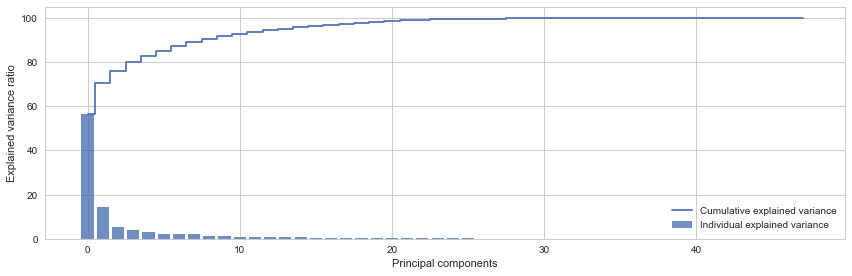

In [451]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize = (12, 4))
    plt.bar(range(48), var_exp, alpha = 0.8, align = 'center', 
            label = 'Individual explained variance')
    plt.step(range(48), cum_var_exp, where = 'mid', 
             label = 'Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc = 'best')
    plt.tight_layout()

The plot above clearly shows that most of the variance (58% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (17%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

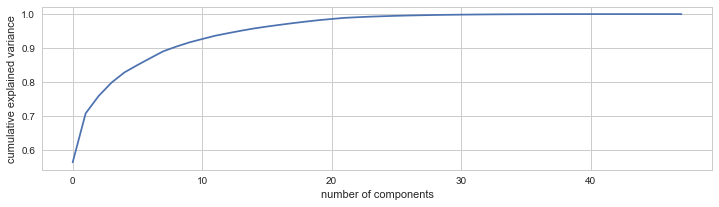

In [449]:
from sklearn.decomposition import PCA 
# the default solver is Singular Value Decomposition
pca = PCA().fit(st_wm)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize = (12, 3))
    plt.plot(np.cumsum(pca.explained_variance_ratio_)) # Explained variance
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

Our scree plot shows that the first 10 principal components describe most of the variation (information) within the data.

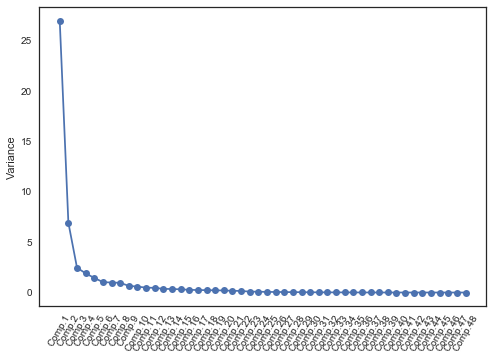

In [412]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, st_wm)

The most obvious change in slope in the scree plot occurs at component 3, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

In [ ]:
list(np.std(pca.transform(st_wm) **2, axis=0))

### SVM

In [ ]:
y = st_wm.competitive_rank
X = st_wm

# split the data into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, # 30% for the evaluation set
                                                    random_state = 42)

In [ ]:
clf = svm.SVC(kernel = 'poly', C = 1).fit(X_train, y_train)
scores = cross_validation.cross_val_score(clf, iris.data, iris.target, cv=5)
print(scores)
print(scores.mean())

## III. (Coming next) Causal Inference 

Causal inference is the process of drawing a conclusion about a causal connection based on the conditions of the occurrence of an effect. The main difference between causal inference and inference of association is that the former analyzes the response of the effect variable when the cause is changed. For the reason that correlations represent simple response to change effects in causes, we need to manage another analysis - causal analysis. 

#####  Questions to answer: 
- Does the number of won games positevly affect the time played by a player in a session? 
- What cause a significant change in a competitive rank of a player?

to follow in the next notebook ...